## **Importing the necessary libraries**

In [1]:
!pip install transformers==4.42.4 -q
!pip install seaborn
!pip install tensorflow
!pip install tf-keras


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 46.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 42.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 28.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report

# Import TensorFlow for deep learning tasks
import tensorflow as tf

# importing library for text preprocessing
import re

# Import modules from the Hugging Face transformers library
from transformers import BertTokenizer, TFBertForSequenceClassification

2025-05-29 17:08:09.419409: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 17:08:09.423549: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 17:08:09.435495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748538489.455337     203 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748538489.461241     203 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748538489.476905     203 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
tf.random.set_seed(42)

In [4]:
##Loading the dataset

In [5]:
df = pd.read_csv('incidentes_seguros.csv')

In [6]:
# creating a copy of the dataset
data = df.copy()

## **Data Overview**

### Checking the first five rows of the data

In [7]:
# Print first 5 rows of data
data.head()

,incidente,etiquetas
0,"MIENTRAS CIRCULABA, UN AUTO CAMBIÓ DE CARRIL S...",Responsabilidad del tercero
1,UN VEHÍCULO SALIÓ SIN AVISAR DE UN ESTACIONAMI...,Responsabilidad del tercero
2,UNA CAMIONETA INVADIÓ MI CARRIL EN UNA CURVA Y...,Responsabilidad del tercero
3,LO DEJÉ ESTACIONADO Y AL REGRESAR TENÍA RAYONE...,Anonimo
4,UN MOTOCICLISTA ME CRUZÓ DE REPENTE Y NO PUDE ...,Responsabilidad del tercero


### Checking the shape of the dataset

In [8]:
# print shape of data
data.shape

(4000, 2)

In [9]:
### Checking for missing values

In [10]:
# Check for missing values
data.isnull().sum()

incidente    0
etiquetas    0
dtype: int64

In [11]:
### Checking the statistical summary

In [12]:
data.describe()

,incidente,etiquetas
count,4000,4000
unique,15,3
top,"AL GIRAR SIN SEÑALIZAR, GOLPEÉ A UN VEHICULO Q...",Responsabilidad del tercero
freq,338,1616


In [13]:
## **Exploratory Data Analysis (EDA)**

In [14]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
### Univariate Analysis

/tmp/ipykernel_203/2874795580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


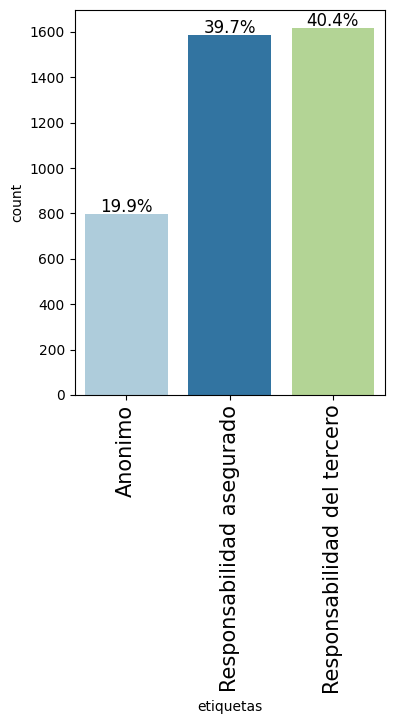

In [16]:
labeled_barplot(data, "etiquetas", perc=True)

In [17]:
## **Data Preprocessing**

In [18]:
dataset = data.copy()

In [19]:
#### **Preprocessing the textual column**

In [20]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [21]:
# preprocessing the textual column
dataset['Incidente'] = dataset['incidente'].apply(preprocess_text)

In [22]:
#### **Splitting the dataset**

In [23]:
# Creating dependent and independent variables
X = dataset['Incidente']
y = dataset['etiquetas']

print('X')
print(X)
print('Y')
print(y)

X
0       mientras circulaba un auto cambi de carril sin...
1       un vehculo sali sin avisar de un estacionamien...
2       una camioneta invadi mi carril en una curva y ...
3       lo dej estacionado y al regresar tena rayones ...
4       un motociclista me cruz de repente y no pude e...
                              ...                        
3995    me distraje cambiando la radio y no vi que el ...
3996    una camioneta invadi mi carril en una curva y ...
3997    me distraje cambiando la radio y no vi que el ...
3998    mientras circulaba un auto cambi de carril sin...
3999    mi vehculo apareci con el espejo retrovisor ro...
Name: Incidente, Length: 4000, dtype: object
Y
0       Responsabilidad del tercero
1       Responsabilidad del tercero
2       Responsabilidad del tercero
3                           Anonimo
4       Responsabilidad del tercero
                   ...             
3995      Responsabilidad asegurado
3996    Responsabilidad del tercero
3997      Responsabilidad

In [24]:
from sklearn.model_selection import train_test_split

# Initial split into training (80%) and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

In [25]:
print(X_train.shape, X_test.shape, X_valid.shape)

(3200,) (400,) (400,)


In [26]:
print(y_train.shape, y_test.shape, y_valid.shape)

(3200,) (400,) (400,)


In [27]:
#### **Label Encoding**

In [28]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc = encoder.fit_transform(y_train)

# applying the encoder mapping from training labels to validation and test labels
y_valid_enc = encoder.transform(y_valid)
y_test_enc = encoder.transform(y_test)

In [29]:
#### **Tokenization**

In [30]:
# loading and creating an instance of the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [31]:
# specifying the maximum length of the input
max_length = 512

In [32]:
X_train_tokenized = tokenizer(
    X_train.values.tolist(),    # passing the data as a list to the tokenizer
    max_length=max_length,    # specifies the maximum length of the tokenized data
    padding='max_length',    # padding the data to the specified maximum length
    truncation=True,    # truncating the input if it is longer than the specified maximum length
    return_attention_mask=True,    # specifying to return attention masks
    return_tensors='tf',    # specifying to return the output as tensorflow tensors
)

2025-05-29 17:08:13.113194: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [33]:
X_valid_tokenized = tokenizer(
    X_valid.values.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='tf',
)

In [34]:
X_test_tokenized = tokenizer(
    X_test.values.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='tf',
)

Converting regular data into a batched tensorflow dataset helps in optimizing memory usage. We can do that in the following steps.

1. Convert the tokenized input into a dictionary
2. Zip the dictionary and target labels into a tensorflow dataset
3. Split the tensorflow dataset into batches

In [35]:
# defining the size of the batches
batch_size = 8

# converting the tokenized input and the output into a batched tensorflow dataset for training
train_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_train_tokenized), y_train_enc)).batch(batch_size)

# converting the tokenized input and the output into a batched tensorflow dataset for validation
valid_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_valid_tokenized), y_valid_enc)).batch(batch_size)

# converting the tokenized input and the output into a batched tensorflow dataset for testing
test_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_test_tokenized), y_test_enc)).batch(batch_size)

In [36]:
## **Model Building**

In [37]:
### **Loading the Model**

In [38]:
# Getting the number of unique classes
num_classes = y.nunique()
num_classes

3

In [39]:
# Model initialization using BERT for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
# print the summary of the model
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
### **Fine-tuning the model**

In [42]:
# setting the learning rate for the optimizer
learning_rate = 1e-5

# Setting the optimizer to Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# Specify the loss function for the model
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define evaluation metric(s) for the model
metric = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model with the chosen optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

In [43]:
# Calculate class weights for imbalanced dataset
cw = (y_train_enc.shape[0]) / np.bincount(y_train_enc)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[encoder.transform(encoder.classes_)[i]] = cw[i]

In [44]:
# Number of training epochs
n_epochs = 3

bert_base_tuned = model.fit(train_tokenized_tf, epochs=n_epochs, validation_data=valid_tokenized_tf, class_weight=cw_dict)

Epoch 1/3
400/400 [==============================] - 3507s 9s/step - loss: 0.6480 - accuracy: 0.9453 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 2/3
400/400 [==============================] - 3487s 9s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/3
400/400 [==============================] - 3486s 9s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000


In [45]:
# Generate raw predictions on the validation dataset using the trained model
preds_raw_val = model.predict(valid_tokenized_tf)

# Extract predicted labels by finding the index with the highest probability for each example
preds_val = np.argmax(np.array(tf.nn.softmax(preds_raw_val.logits)), axis=1)

# Display the shape of the predicted labels array
preds_val.shape

50/50 [==============================] - 156s 3s/step


(400,)

In [46]:
#### Evaluation Metrics

2025-05-29 20:05:32.835232: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


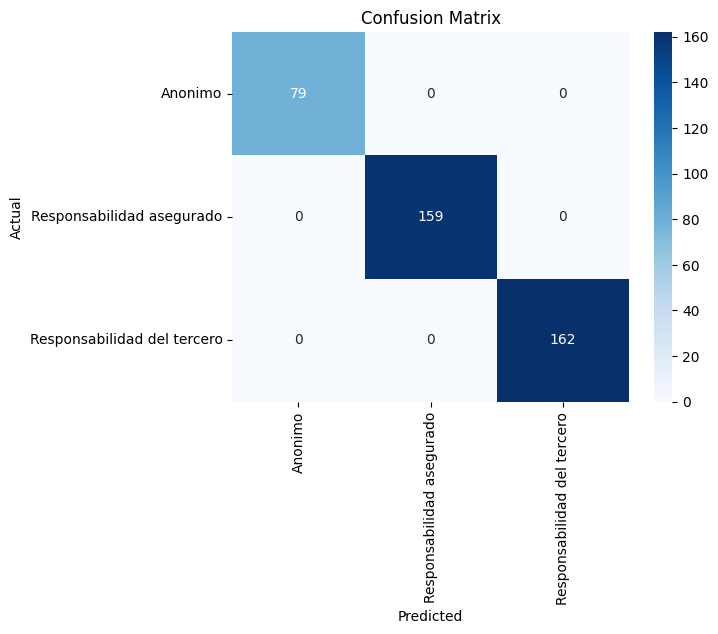

In [47]:
# retrieving the labels from the tensorflow dataset
actual_val = np.concatenate([y for x, y in valid_tokenized_tf], axis=0)

# Creating confusion matrix
cnf_mt = confusion_matrix(actual_val, preds_val)

# Visualizing confusion matrix using a heatmap
labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Display classification report
print('Classification Report:')
print(classification_report(actual_val, preds_val))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       162

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [49]:
## **Model Testing**

In [50]:
# Predictions
preds_raw_test = model.predict(test_tokenized_tf)
preds_test = np.argmax(np.array(tf.nn.softmax(preds_raw_test.logits)), axis=1)
preds_test.shape

50/50 [==============================] - 154s 3s/step


(400,)

In [51]:
#### Evaluation Metrics

2025-05-29 20:08:07.193153: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


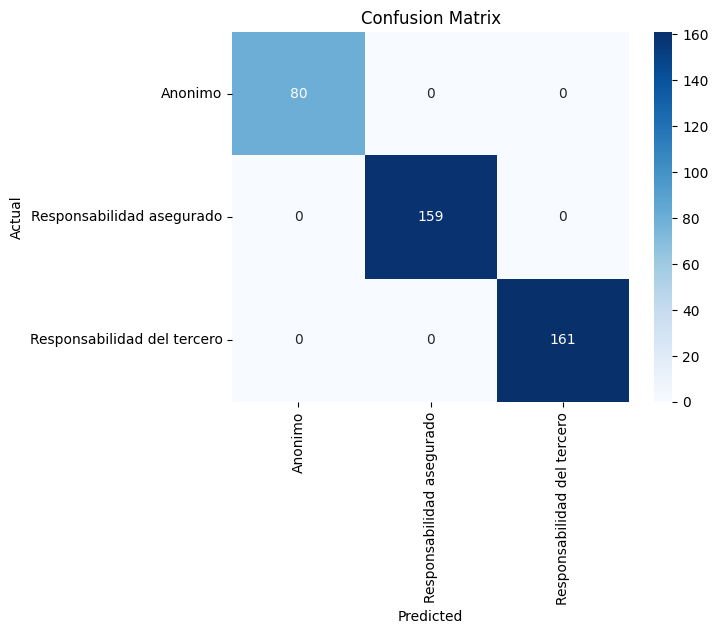

In [52]:
# retrieving the labels from the tensorflow dataset
actual_test = np.concatenate([y for x, y in test_tokenized_tf], axis=0)

# Creating confusion matrix
cnf_mt = confusion_matrix(actual_test, preds_test)

# Visualizing confusion matrix using a heatmap
labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Display classification report
print('Classification Report:')
print(classification_report(actual_test, preds_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       161

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

